# Image Processing 

## Synthèse des images bruitées

### Introduction
    dans cette partie du TP, l'objectif est la restauration d'image altérées par différents types de dégradation: 
    * Bruit additionnel gaussien ou impulsionnel 
    * Bruit Convolutif 
    * Bruit multiplicatif périodique
    Enutilisant les techniques spatiales ou spectrales, linéaires ou non linéaires

### the needed packages 

In [228]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 
from PIL import ImageFilter 
import timeit 
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr 
%matplotlib inline 

the picture has 1153 lignes and 771 colonnes 
 your picture :


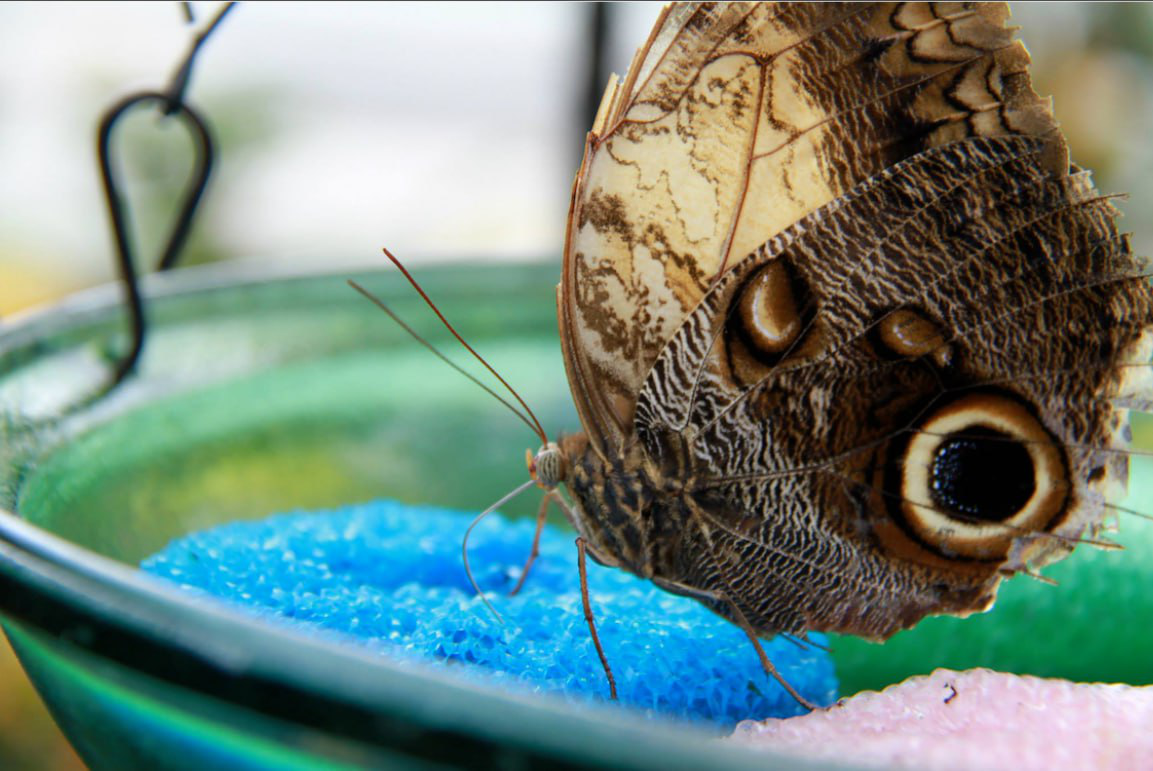

In [229]:
#chargement d'image dans la variable im 
im = Image.open("./pic.jpg")
im = im.convert('RGB')
N, M = im.size
print(f"the picture has {N} lignes and {M} colonnes \n" , "your picture :")
#l'affichage d'image a chargée 
im

## Generation des images dégradées

## Degradation par bruit aditionnel

#### Converting the image to a gray image using the rgb2gray () 


In [230]:
#rgb2gray using array based operations
def rgb2gray (image): 
    pic = image.split()
    #layer_r = np.array(image)[:, :, 0]
    #layer_g = np.array(image)[:, :, 1]
    #layer_b = np.array(image)[:, :, 2]
    pic = np.array(pic)
    L = np.uint8(0.299 *pic[0] + 0.587*pic[1] + 0.114*pic[2])
    L = Image.fromarray(L)
    return L 

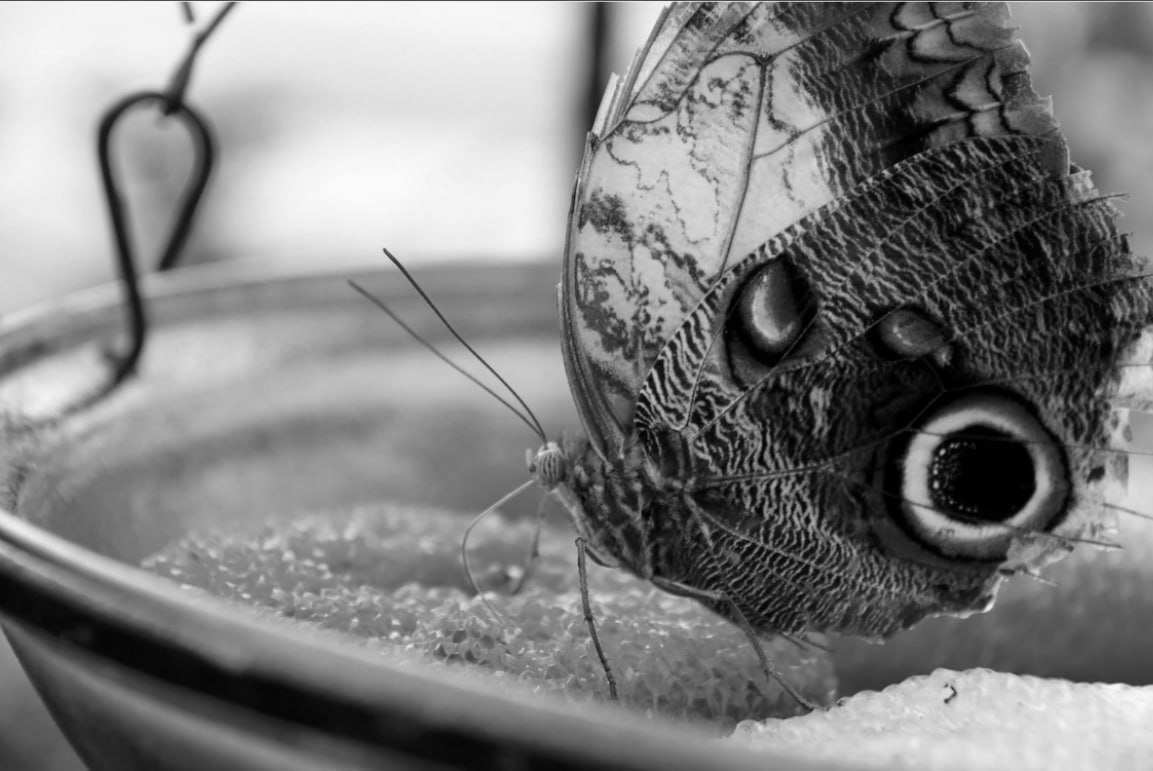

In [231]:
#affichage d'image de luminesence
rgb2gray(im)

In [232]:
#rgb2gray using pixel to pixel operations 
def rgb2gray2(im):
    out=Image.new("L",im.size)
    M,N=im.size
    for m in range(M):
        for n in range(N):
            p=im.getpixel((m,n))
            gray=int(p[0]*0.299+p[1]*0.587+p[2]*0.144)
            out.putpixel((m,n),gray)
            
    return out

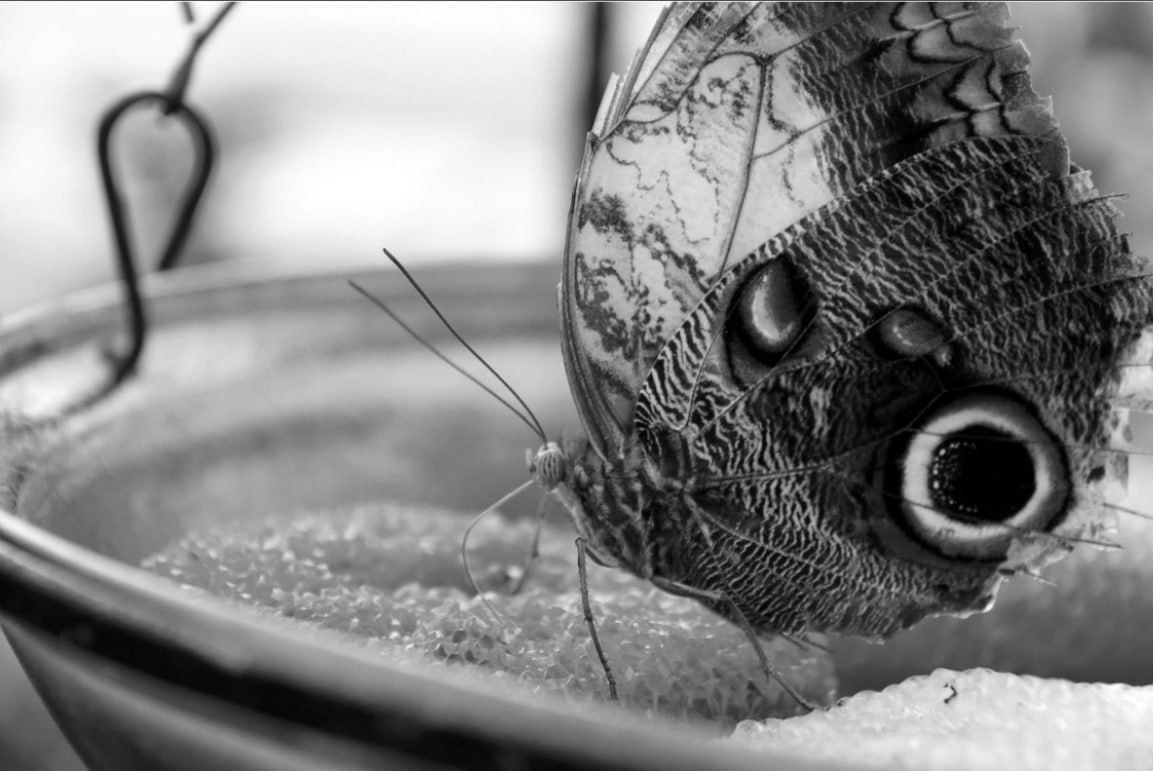

In [233]:
#affichage d'image de luminesence
rgb2gray2(im)

* comparing the performance between the two appraoches 

In [234]:
#time complexity of the first fun
def work (): 
    rgb2gray(im)
timeit.timeit ('work()', globals=globals(), number =1)

0.02672109999912209

In [235]:
#time complexity of the second fun
def work (): 
    rgb2gray2(im)
timeit.timeit ('work()', globals=globals(), number =1)

1.8741595999999845

* the first code is more efficient than the other

#### developing the imnoise() function that returns blured images using the additionnal noise : 
    * salt and pepper 
    * gaussian blur 

In [236]:
from random import choice
def imnoise ( image ,  noise_type , noise_param , show=False ):
    noisy_image= image.copy()
    n, m = image.size
    im_array = np.array(image)
    k = int (n*m* noise_param)
    a=np.random.randint(0, n-1, k)
    b=np.random.randint(0, m-1, k)
    z= zip(a , b)
        # salt noise replace the value of a random pix of the image with 255
    if noise_type == "s":
            for c in z:
                noisy_image.putpixel ( c , 255)
            
        # pepper noise replace the value of a random pix of the image with 0
    elif noise_type == "p":
        for c in z :
            noisy_image.putpixel ( c, 0)
            
        # salt& pepper noise replace the value of a random pix of the image randomply  with 255 or 0
    elif noise_type =="s&p":
        a=np.random.randint(0, n-1, k)
        b=np.random.randint(0, m-1, k)
        for c in z: 
            noise_value = choice([0, 255])
            noisy_image.putpixel(c, noise_value)
                
            #the gaussian noise, normal distribution 
        #to implement the guassian noise we will use the random.normal() fun from numpy 
    #  random.noraml()takes three main args : mean "0"; scale or standard deviation and the size of the image 
    #the standar deviation, stddev is calculated using the variance 
    elif noise_type == "gaussian": 
        #noise = np.zeros ((m,n))
        #stdev= np.sqrt(noise_param)
        noise = np.random.normal(0, noise_param, im_array.shape)
        noisy = im_array + noise
    
        noisy = np.clip(noisy, 0, 255)
        noisy= Image.fromarray(noisy.astype(np.uint8))
        noisy_image = noisy 
        
  
    if show: 
        image.show()
    else:
        return noisy_image

In [237]:
gray_image = rgb2gray(im.copy())

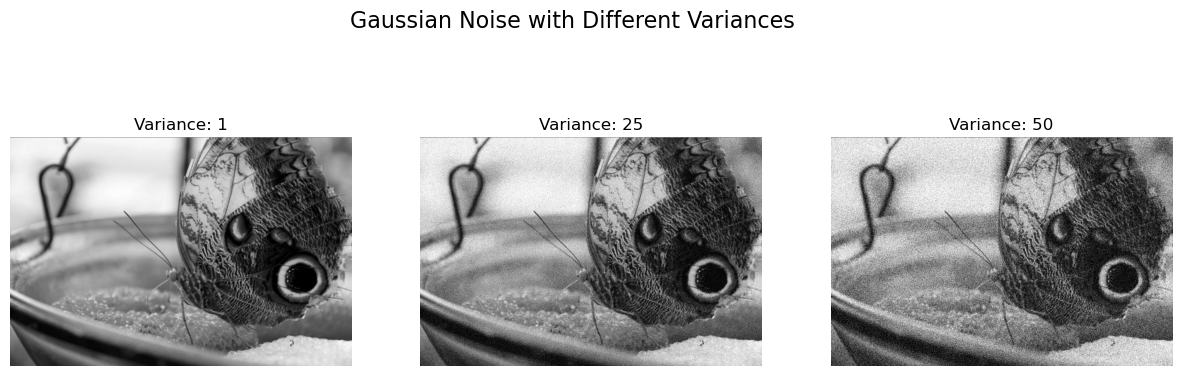

In [238]:
# applying the gaussian noise 
variance = [1 ,25,50]
blured_img_gauss = []
blured_img_gauss = [imnoise ( gray_image ,  'gaussian' , s, show= False ) for s in variance]

# Display the images in a single plot to compare the effect of the variance 
fig, axes = plt.subplots(1, len(blured_img_gauss), figsize=(15, 5))
fig.suptitle("Gaussian Noise with Different Variances", fontsize=16)

for ax, image, var in zip(axes, blured_img_gauss, variance):
    ax.imshow(image, cmap='gray') 
    ax.set_title(f"Variance: {var}")
    ax.axis('off') 

plt.show() 


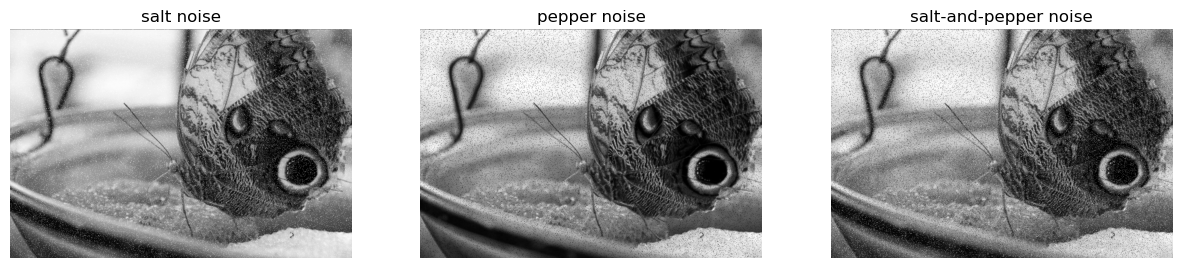

In [239]:
blured_salt_img = imnoise ( gray_image ,  's' , 0.05, show= False )

blured_pepper_img= imnoise ( gray_image,  'p' , 0.05, show= False )

blured_sandp_img= imnoise (gray_image,  's&p' , 0.1, show= False)

# Displaying the images with differentimpulsionnel noise 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

titles = ["salt noise", "pepper noise", "salt-and-pepper noise"]
images = [blured_salt_img, blured_pepper_img, blured_sandp_img]

for ax, title, image in zip(axes, titles, images):
    ax.imshow(image, cmap='gray')
    ax.set_title(title) 
    ax.axis('off') 
    
plt.show()  


## Degradation par bruit Convolutive

In [240]:
def conv_blur( image , kernel ):
    N,M = image.size
    picf = np.zeros((M,N))
    for i in range(M):
        picf[i,:] = np.convolve(np.asarray(image)[i,:], kernel, "same")
    for j in range(N):
        picf[:,j] = np.convolve(picf[:,j], kernel, "same")
    img = picf.astype('uint8')
    blured_image =Image.fromarray(img)
    return blured_image

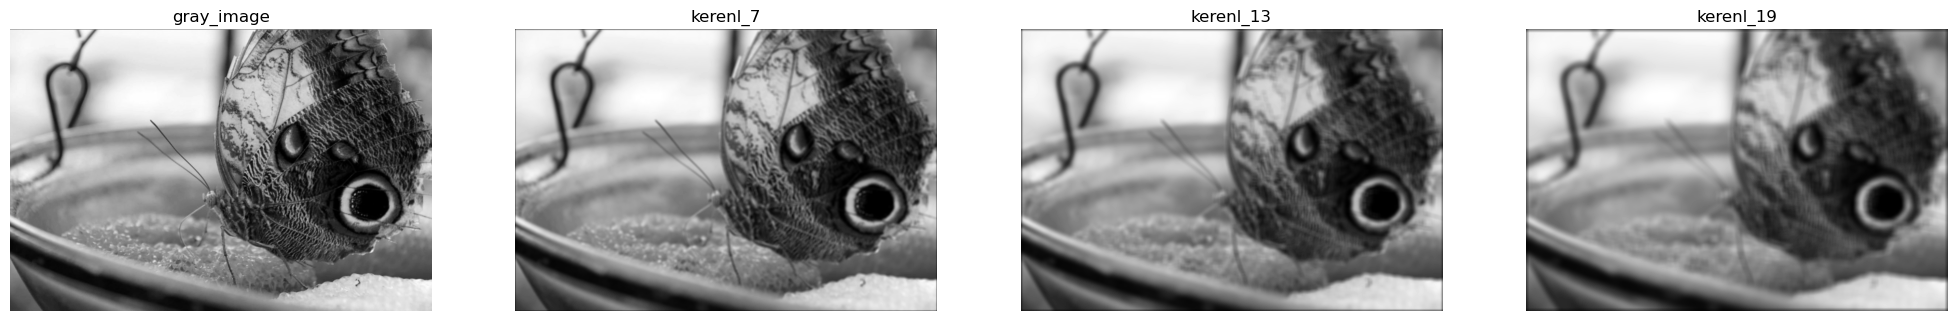

In [241]:
kernel_7 = 1/7*np.ones(7)
kernel_13 = 1/13*np.ones(13)
kernel_19 = 1/19*np.ones(19)
# generating the images with diffrent kernel size
picture_7= conv_blur ( gray_image , kernel_7 )
picture_13= conv_blur ( gray_image , kernel_13 )
picture_19= conv_blur ( gray_image , kernel_19 )

fig, axes = plt.subplots(1, 4, figsize=(25, 10))  

titles = ["gray_image", "kerenl_7", "kerenl_13", "kerenl_19"]
images = [gray_image, picture_7, picture_13, picture_19]

for ax, title, image in zip(axes, titles, images):
    ax.imshow(image, cmap='gray')
    ax.set_title(title) 
    ax.axis('off') 
    
plt.show()  


    when augmenting the kerenl size the smoothing effect of the convolutionnal becomes bigger (median filter) 

In [242]:
"""
imgd = rgb2gray(im.copy())
#imh = np.array(imgd)
for kernel_size in [7,13,19]:
    blurred_image= conv_blur(imgd, kernel_size)
    print(f"Blurred image with kernel size {kernel_size}:\n{blurred_image}")
"""

'\nimgd = rgb2gray(im.copy())\n#imh = np.array(imgd)\nfor kernel_size in [7,13,19]:\n    blurred_image= conv_blur(imgd, kernel_size)\n    print(f"Blurred image with kernel size {kernel_size}:\n{blurred_image}")\n'

# Image Denoising 
##  introduction: 
    dans cette partie du TP nous allons nous focaliser sur la mise en place des alogorithms de restauration des images bruites en utilisant par les approches linéaires dans le domaine spatial et spectral 

## Restauration des images altérées pad de bruit additinnel 

### Suppression du Bruit Impulsionnel (Salt & pepper)

In [243]:
def blur_noisy_image ( image , kernel ):
    N,M = image.size
    picf = np.zeros((M,N))
    for i in range(M):
        picf[i,:] = np.convolve(np.asarray(image)[i,:], kernel, "same")
    for j in range(N):
        picf[:,j] = np.convolve(picf[:,j], kernel, "same")
    img = picf.astype('uint8')
    snr = psnr(np.asarray(image), img)
    return Image.fromarray(img) , snr

#### denoising the blured image with salt noise 

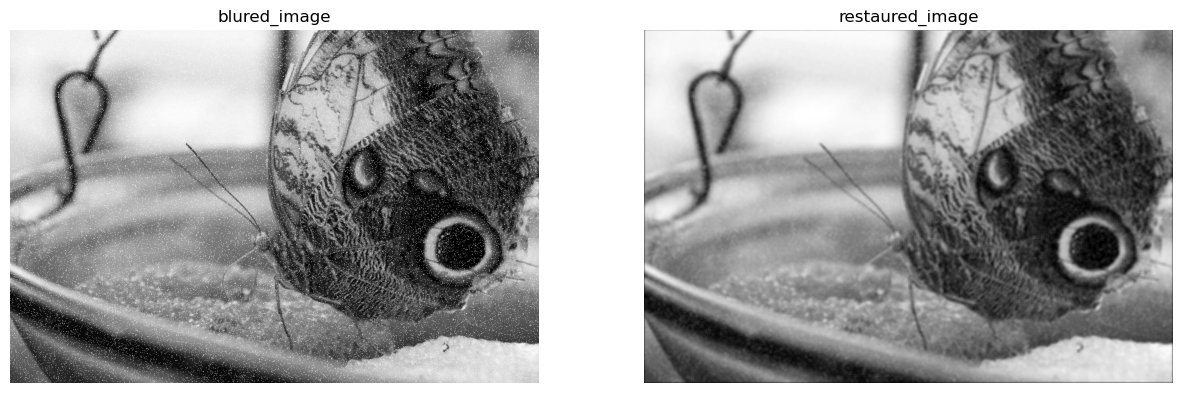

In [244]:
kernel = 1/7*np.ones(7)
picture, R= blur_noisy_image ( blured_salt_img , kernel )
# Displaying the images with differentimpulsionnel noise 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  

titles = ["blured_image", "restaured_image"]
images = [blured_salt_img, picture]

for ax, title, image in zip(axes, titles, images):
    ax.imshow(image, cmap='gray')
    ax.set_title(title) 
    ax.axis('off') 
    
plt.show()  



#### Etudiant l'effet de la taille dyu noyau du filtre et de la densité du bruit sur la qaulité de restauration 

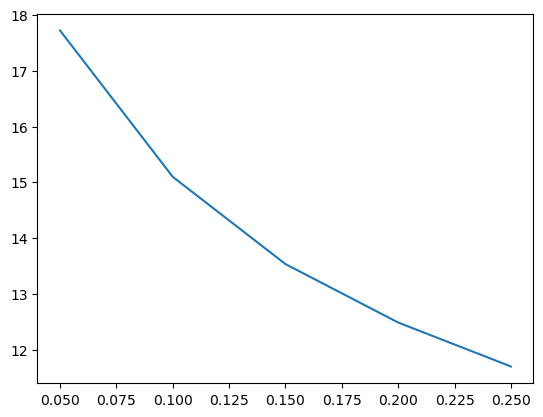

In [245]:
#l'effet de la densité du bruit  sur la restauration
psnr_arry = []
for d in [0.05,0.1,0.15,0.2,0.25]:
    kern = np.ones(7)/7
    noisy = imnoise(gray_image,'s&p',d)
    _ , val = blur_noisy_image( noisy , kern )
    psnr_arry.append(val)
    
plt.plot([0.05,0.1,0.15,0.2,0.25], psnr_arry)

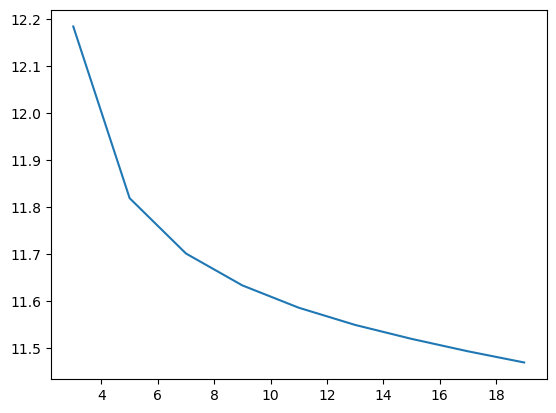

In [246]:
#l'effet de la taille du noyau du filtre sur la restauration 
psnr_arry = []
for dim in range(3,21,2):
    kern = np.ones(dim)/dim
    val = blur_noisy_image ( noisy , kern )[1]
    psnr_arry.append(val)
    
plt.plot(range(3,21,2), psnr_arry)

### Supression du bruit Gaussien dans le domaine spatiale 

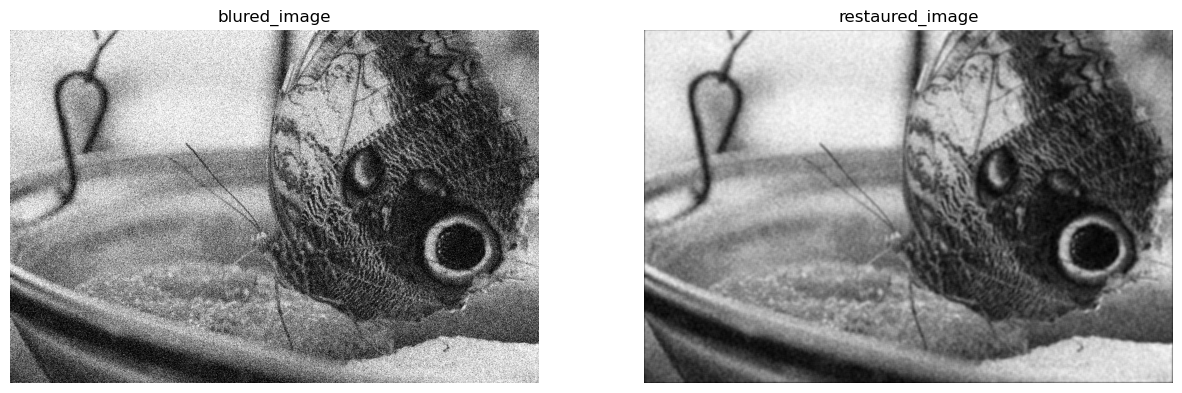

In [247]:
kernel = 1/7*np.ones(7)
gauss, R_gauss= blur_noisy_image ( blured_img_gauss[2] , kernel )
# Displaying the images with differentimpulsionnel noise 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  

titles = ["blured_image", "restaured_image"]
images = [blured_img_gauss[2], gauss ]

for ax, title, image in zip(axes, titles, images):
    ax.imshow(image, cmap='gray')
    ax.set_title(title) 
    ax.axis('off') 
    
plt.show()  



In [248]:
R_gauss

15.014646696204215

#### Etudiant l'effet de la taille dyu noyau du filtre et de la densité du bruit sur la qaulité de restauration 

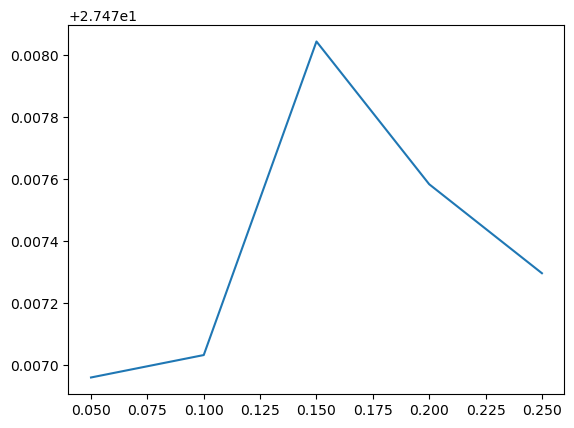

In [249]:
#l'effet de la densité du bruit  sur la restauration
psnr_arry = []
for d in [0.05,0.1,0.15,0.2,0.25]:
    kern = np.ones(7)/7
    noisy_gauss = imnoise(gray_image,'gaussian',d)
    _ , val = blur_noisy_image( noisy_gauss , kern )
    psnr_arry.append(val)
    
plt.plot([0.05,0.1,0.15,0.2,0.25], psnr_arry)

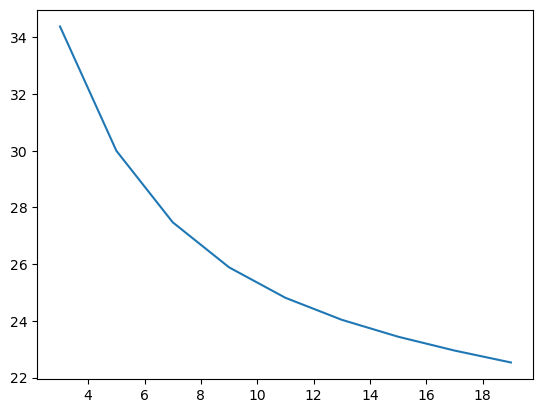

In [250]:
#l'effet de la taille du noyau du filtre sur la restauration 
psnr_arry = []
for dim in range(3,21,2):
    kern = np.ones(dim)/dim
    val = blur_noisy_image ( noisy_gauss , kern )[1]
    psnr_arry.append(val)
    
plt.plot(range(3,21,2), psnr_arry)

### Supression du bruit impulsionnel dans le domaine spectrale 

###### Le spectre d'image bruitée 
    -> for this part we gonna use the salt& pepper noise 

In [251]:
def clacule_specter(image_array):
    fft_result = np.fft.fft2(image_array)
    fft_shifted = np.fft.fftshift(fft_result)
    amplitude = np.abs(fft_shifted)
    phase = np.angle(fft_shifted)
    return amplitude, phase

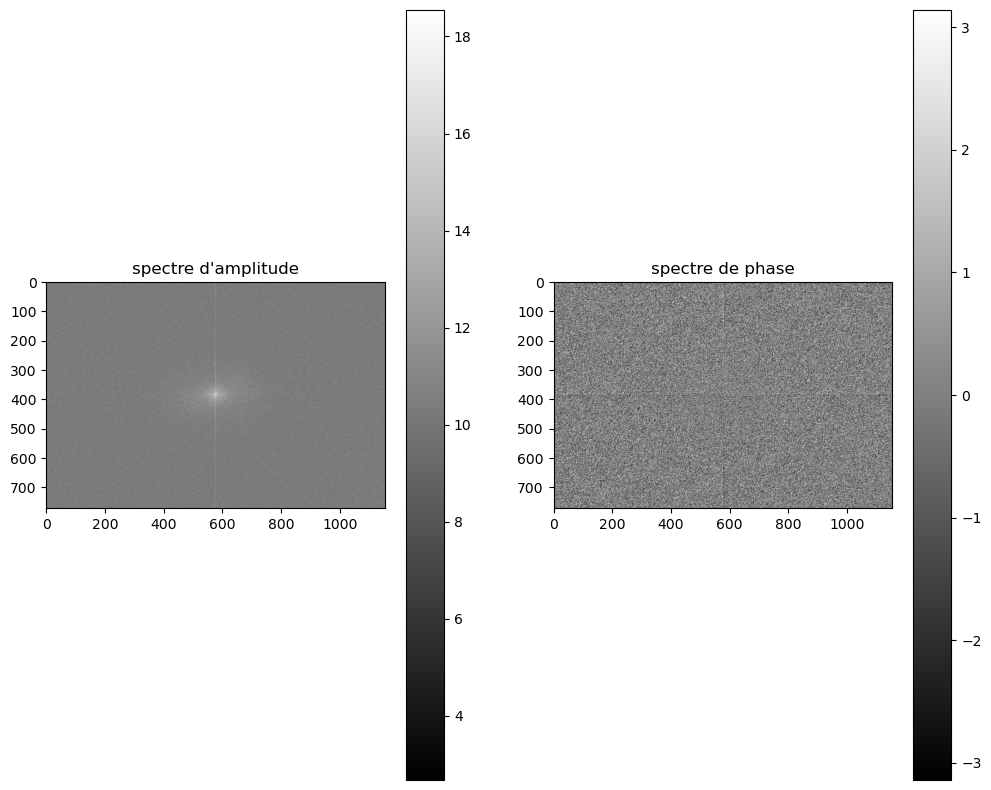

In [252]:
image_array = np.asarray(blured_sandp_img)

amplitude, phase = clacule_specter(image_array)

plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
plt.title("spectre d'amplitude")
plt.imshow(np.log(1 + amplitude), cmap='gray')  
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("spectre de phase") ## similaire d'un bruit 
plt.imshow(phase, cmap='gray')  
plt.colorbar()

plt.show()



In [253]:
def gen_rectangle(xi, xf):
    x1, y1 = xi
    x2, y2 = xf
    return np.array([x1, x2, x2, x1, x1]), np.array([y1, y1, y2, y2, y1])

In [254]:
#defining un filtre a boite spectrale 

def generate_square_mask (shape, D): 
    mask = np.zeros(shape)
    center = (shape[0]//2, shape[1]//2)
    square_start = (center[0]-D//2, center[1] - D // 2)
    square_end = (center[0] + D // 2, center[1] + D // 2)
    
    mask[square_start[0]:square_end[0], square_start[1]:square_end[1]] = 1   # filtrage a boite spectrale 
    return mask

In [255]:
## aplying the mask on the amplitude spectrum 
image_array = np.asarray(blured_sandp_img)
d= 10
amplitude, phase = clacule_specter(image_array)
mask = generate_square_mask(amplitude.shape, d)


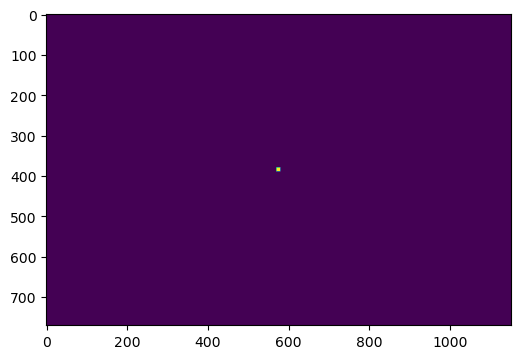

In [256]:
#plotting the filtre
plt.figure(figsize=(6, 6))
plt.imshow(mask) 

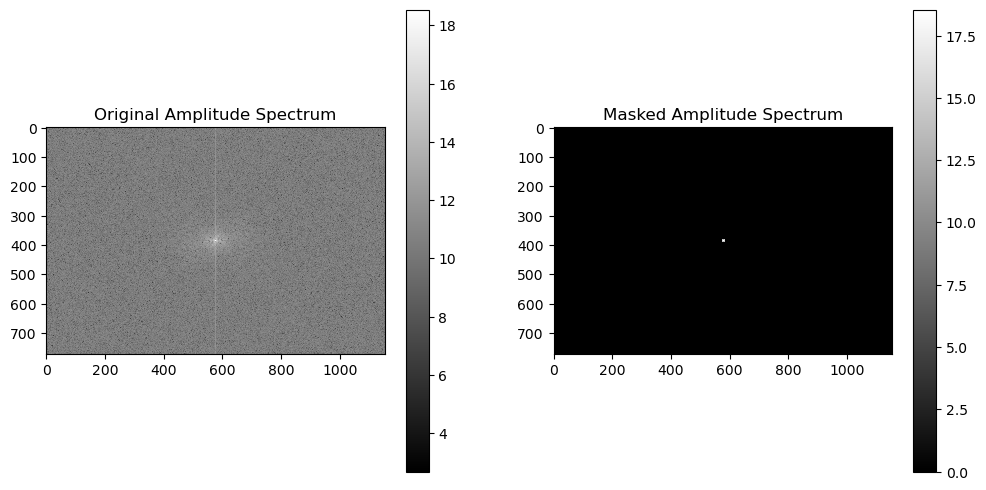

In [257]:
amplitude_masked = amplitude * mask

# Display the original amplitude spectrum and the masked amplitude spectrum
plt.figure(figsize=(12, 6))

# Original Amplitude Spectrum
plt.subplot(1, 2, 1)
plt.imshow(np.log(1 + amplitude), cmap='gray', interpolation='nearest')
plt.title("Original Amplitude Spectrum")
plt.colorbar()

# Masked Amplitude Spectrum
plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + amplitude_masked), cmap='gray', interpolation='nearest')
plt.title("Masked Amplitude Spectrum")
plt.colorbar()

plt.show()

In [258]:
## implemting the reversed fourier tranformer to get the blurred image
def fourier_inverse(mask, amplitude , phase): 
    amplitude_masked = amplitude*mask 
    fft_masked = amplitude_masked * np.exp(1j*phase)
    
    ifft_result = np.fft.ifftshift(fft_masked)
    reconstructed_image = np.fft.ifft2(ifft_result)
    reconstructed_image = np.real( reconstructed_image)
    reconstructed_image= np.clip ( reconstructed_image, 0,255).astype(np.uint8)
    
    return  reconstructed_image
        

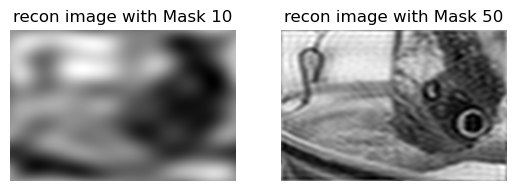

In [259]:
## generating two masks to compare the effect of mask size on the filtrage 
mask_10 = generate_square_mask(amplitude.shape, 10)
mask_50 = generate_square_mask(amplitude.shape, 50)

## aplying the ifft 

recon_image_10= fourier_inverse(mask_10, amplitude , phase)
recon_image_50= fourier_inverse(mask_50, amplitude , phase)

## displaying the image
plt.subplot(1, 2, 1) 
plt.imshow(recon_image_10, cmap='gray')  
plt.title("recon image with Mask 10")
plt.axis('off') 

plt.subplot(1, 2, 2)  
plt.imshow(recon_image_50, cmap='gray')  
plt.title("recon image with Mask 50")
plt.axis('off') 

plt.show() 

    -> plus que la taille de filtre a boite diminue plus qu'on laisse des basses frequeces passe ( le centre de spectre represente les basses frequences) et par consequence on augmente l'effet de Lissage.
    

In [264]:
## Calcule de PSNR 
#blured_sandp_img_np is image_array var
original_image_np = np.asarray(gray_image)
P = psnr(original_image_np, recon_image_50_np)
P


21.919715239645377

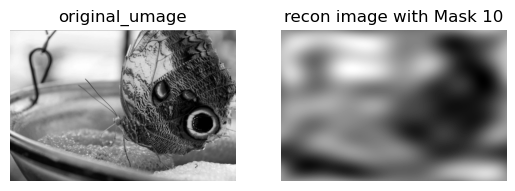

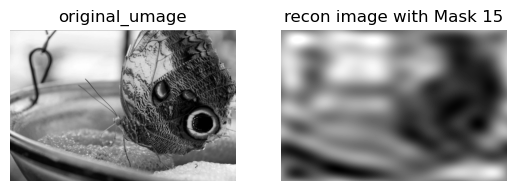

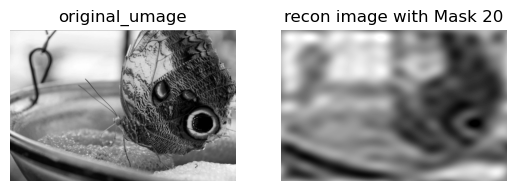

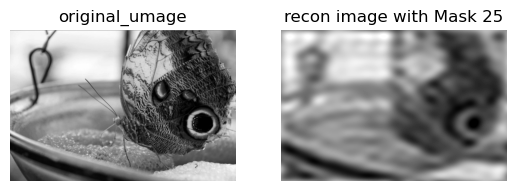

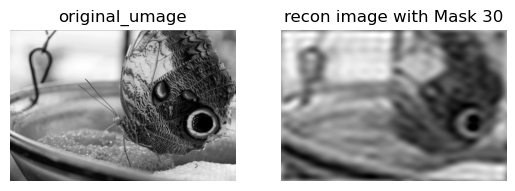

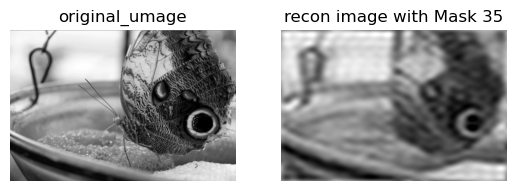

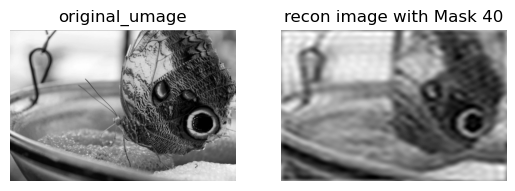

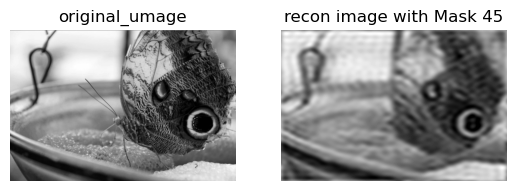

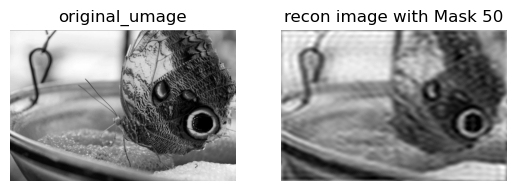

PSNR values for different mask sizes: [16.80089975384157, 17.95792096080988, 18.943727036810017, 19.500182696168686, 20.202562840194602, 20.562131206592326, 21.11868231539571, 21.49117922484637, 21.919715239645377]


In [269]:
# calculating the PSNR selon la taille du mask 

d = [10, 15, 20, 25, 30, 35, 40, 45, 50]
psnr_values = []

for size in d:
    mask = generate_square_mask(amplitude.shape, size)  # Generate the square mask
    recon_image = fourier_inverse(mask, amplitude, phase)  # Reconstruct the image
    recon_image = recon_image.astype('uint8')
    recon_image_np = np.asarray(recon_image)
    value = psnr(original_image_np, recon_image_np)
    psnr_values.append(value)
    ## displaying the images
    plt.subplot(1, 2, 1) 
    plt.imshow(original_image_np, cmap='gray')  
    plt.title("original_umage")
    plt.axis('off') 

    plt.subplot(1, 2, 2)  
    plt.imshow(recon_image, cmap='gray')  
    plt.title(f"recon image with Mask {size}")
    plt.axis('off') 

    plt.show() 

print("PSNR values for different mask sizes:", psnr_values)



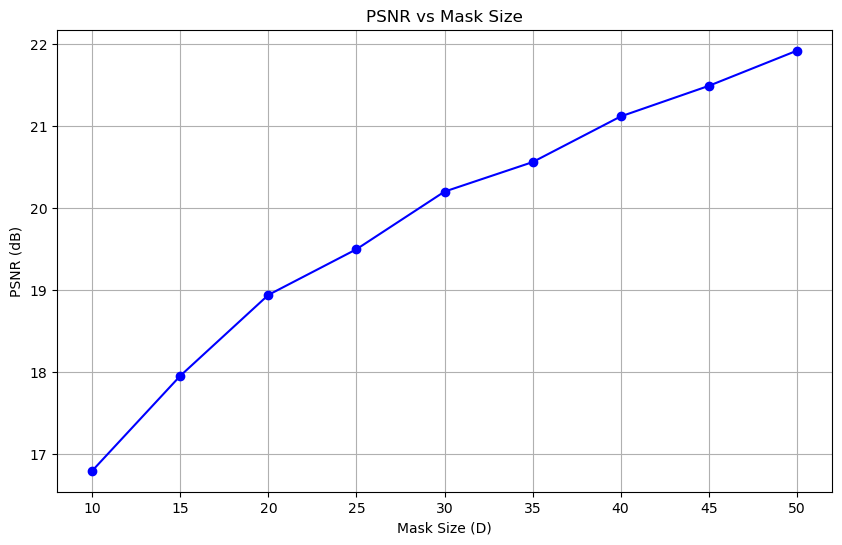

In [266]:
# ploting  the PSNR values to visualize the effect of mask size
plt.figure(figsize=(10, 6))
plt.plot(d, psnr_values, marker='o', linestyle='-', color='b')
plt.title("PSNR vs Mask Size")
plt.xlabel("Mask Size (D)")
plt.ylabel("PSNR (dB)")
plt.grid(True)
plt.show()

    -> we notice that smaller mask sizes are generally lead to better image quality after spectral masking 